In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np

In [2]:
# skleran 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets


In [3]:
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# DESCR 키를 이용하여 데이터셋 설명 출력

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
# target 속성의 데이터 셋 크기
print("데이터셋 크기:", iris['target'].shape)


# target 속성의 데이터 셋 내용
print("데이터셋 내용:", iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# data 속성을 판다스 데이터프레임으로 변환 

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 열(column) 이름을 간결하게 변경

df.columns=['sepal_length', 'sepal_width', 'petal_length' , 'petal_width']
df.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#target 열 추가

df['target'] = iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# 데이터 프레임 기본 정보

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# 결측값 확인
df.isnull().sum()

# 중복 데이터 확인
df.duplicated().sum()

1

In [11]:
# 중복 데이터 출력
df.loc[df.duplicated(),:]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [12]:
# 중복 데이터 확인 
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

# 101번과 142번 데이터 중복
# 142번 제거하기

df = df.drop_duplicates()

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# 변수 간의 상관 관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [14]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=1.2)



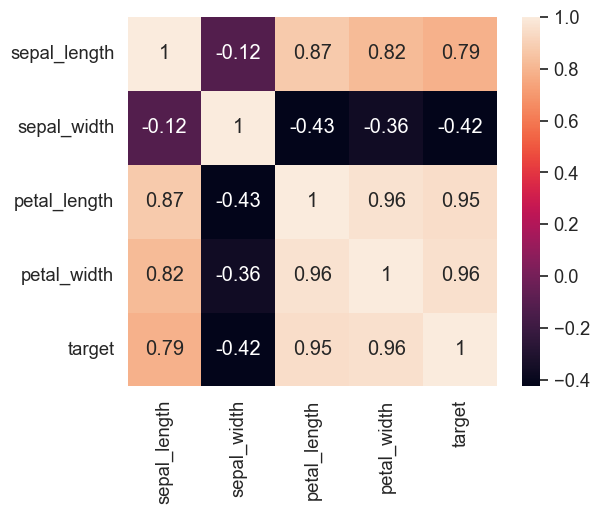

In [15]:
# 상관 계수 히트맵
# annot : 상관계수 숫자를 표기할지

sns.heatmap(data=df.corr(), square= True, annot=True, cbar=True)
plt.show()


In [16]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 149, dtype: float64

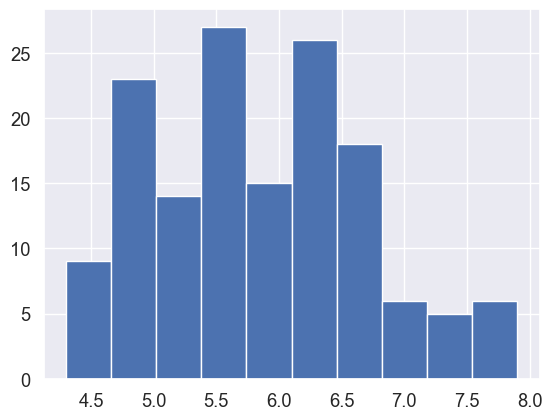

In [17]:
# sepal_lengh 값의 분포 - hist 함수

plt.hist(x='sepal_length', data=df)
plt.show()

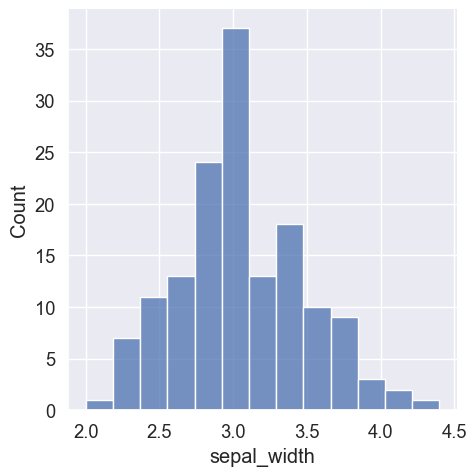

In [18]:
# sepal_width 값의 분포 - displot 함수(histogram)
sns.displot(x='sepal_width', kind='hist', data=df)
plt.show()

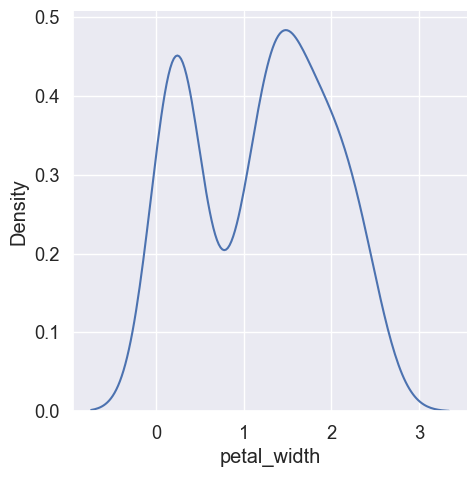

In [19]:
# petel_length 값의 분포 - displot 함수 (kde 밀도 함수 그래프)
sns.displot(x='petal_width', kind='kde', data=df)
plt.show()


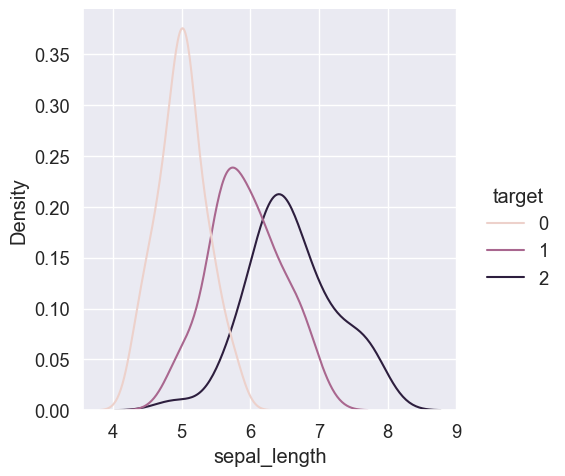

In [20]:
# 품종별 sepal_length 값의 분포 비교

# hue = 데이터를 구분 기준으로 색상을 다르게 표현하는 기능

sns.displot(x='sepal_length', hue='target', kind='kde', data=df)
plt.show()

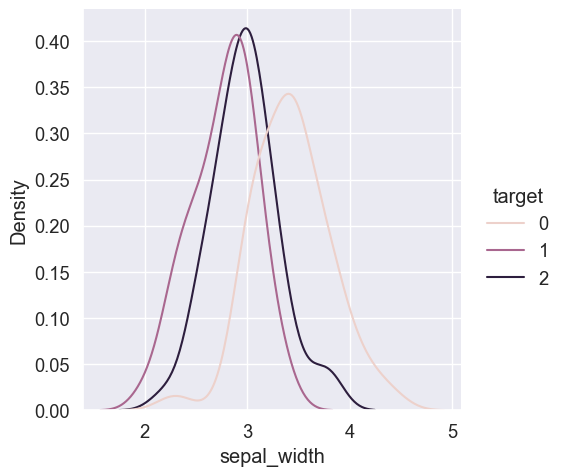

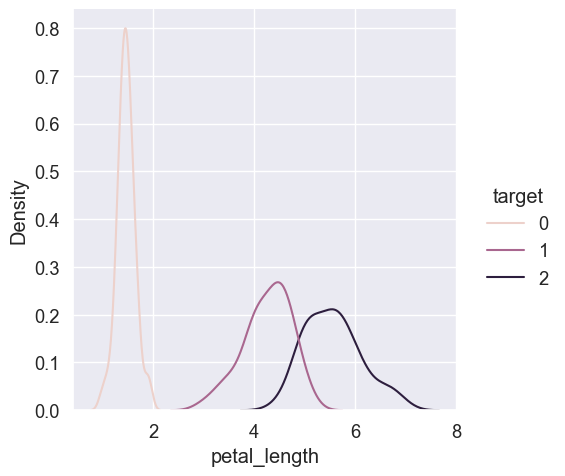

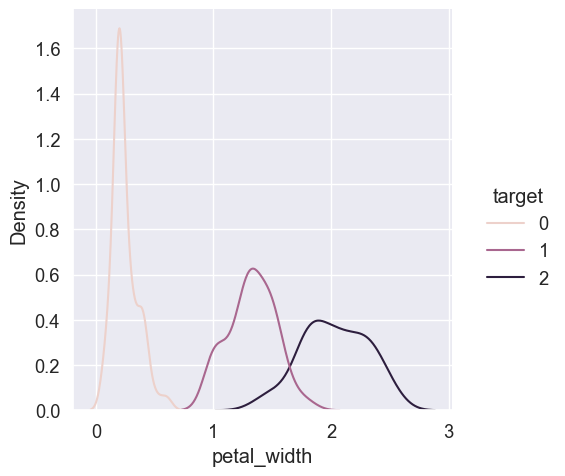

In [21]:
# 나머지 3개 피처 데이터를 한번에 그래프로 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='target', kind= 'kde', data=df)
plt.show()

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


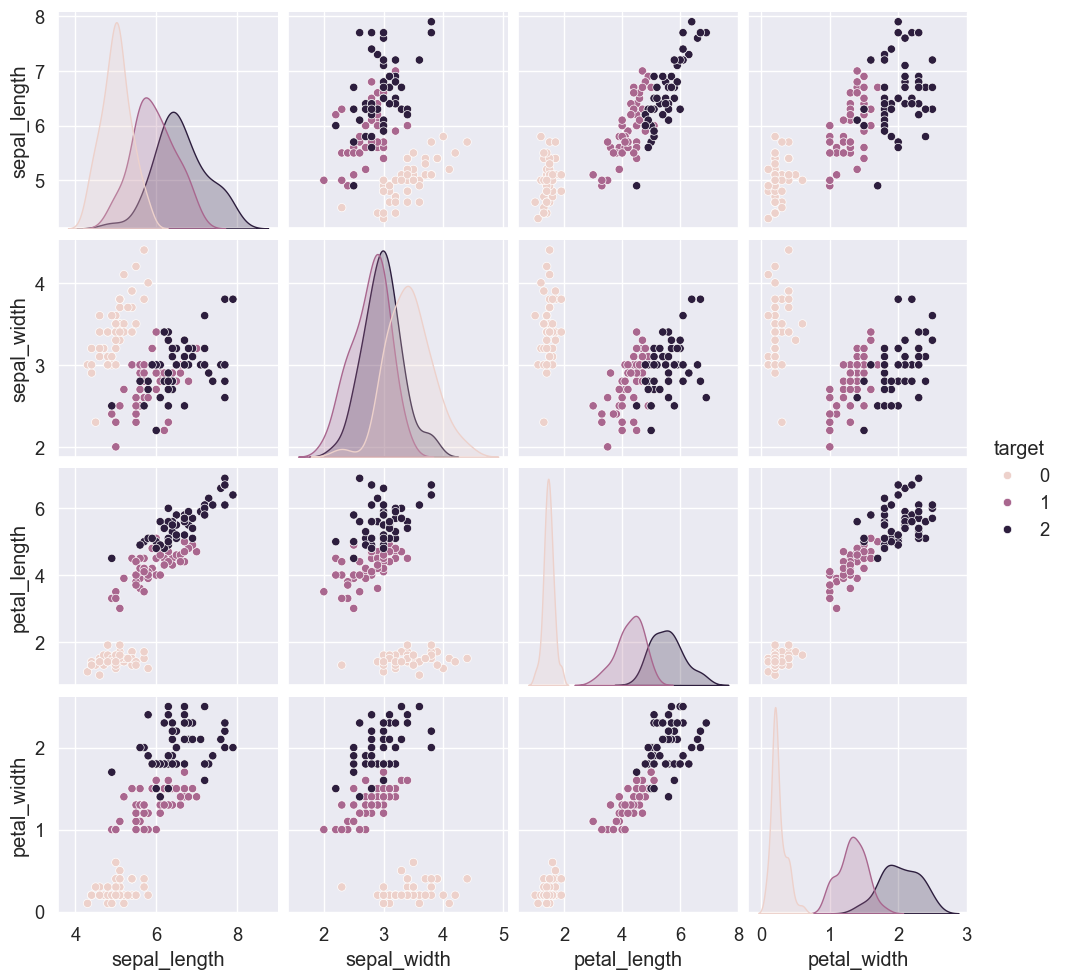

In [22]:
sns.pairplot(df, hue='target', size=2.5, diag_kind='kde')
plt.show()

#Tarin-Test 데이터셋 분할

In [23]:
from sklearn.model_selection import train_test_split

x_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:,'target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


In [24]:
# 분류알고리즘
# 1) KNN 예측하려는 X의 데이터의 속성과 비슷한 K개의 이웃 중 가장 많은 것을 예측값으로 설정


# 모델 학습
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [25]:
# 예측
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred)

예측값: [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 2 1 1 0 2 2]


In [26]:
#성능 평가

from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_knn_pred)
print("정확도: %4f"%knn_acc )

정확도: 0.966667
